# 📒 **NOTEBOOK 01 — EDA**

# Descrição das Variáveis do Dataset

Este projeto tem como objetivo analisar e modelar o risco de crédito, utilizando dados demográficos, financeiros e comportamentais de clientes.  
Abaixo está a descrição das variáveis utilizadas, bem como sua relevância prática no contexto de análise de crédito.

---

## Dados Demográficos e Financeiros do Cliente

### `person_age` — Idade - **INTEIRO**
Idade do solicitante do empréstimo.

**Relevância no Modelo:**  
Perfis muito jovens tendem a apresentar maior risco por falta de histórico financeiro, enquanto perfis mais maduros costumam demonstrar maior estabilidade. Consideramos a Idade Valida entre 0 a 100 anos.

---

### `person_income` — Renda Anual - **FLOAT**
Renda anual declarada pelo cliente.

**Relevância no Modelo:**  
É um dos principais indicadores de capacidade de pagamento. Em função da alta dispersão dos valores, é comum aplicar transformação logarítmica para melhorar a performance dos modelos de *Machine Learning*. Vamos avaliar a melhor forma de utilizar esse dado.

---

### `person_home_ownership` — Situação de Moradia - **OBJECT**
Situação habitacional do cliente (Alugada, Própria, Hipotecada).

**Relevância no Modelo:**  
Clientes com imóvel próprio ou financiado tendem a apresentar maior estabilidade financeira quando comparados a clientes que residem em imóveis alugados.

---

### `person_emp_length` — Tempo de Emprego - **INTEIRO**
Tempo, em anos, no emprego atual.

**Relevância no Modelo:**  
Maior tempo de permanência no emprego indica estabilidade profissional, reduzindo a probabilidade de inadimplência.

---

## Informações do Empréstimo

### `loan_intent` — Finalidade do Empréstimo - **OBJECT**
Motivo da solicitação (ex.: Educacional, Pessoal, Médico, Empreendimento).

**Relevância no Modelo:**  
Determinadas finalidades apresentam maior taxa de inadimplência. Empréstimos para despesas médicas ou consolidação de dívidas podem indicar fragilidade financeira, enquanto educação e empreendedorismo tendem a ser investimentos de longo prazo, possibilitando uma certeza maior da quitação do empréstimo.

---

### `loan_grade` — Classificação de Risco - **OBJECT**
Nota de risco atribuída ao empréstimo (A a G).

**Relevância no Modelo:**  
Classificação prévia de risco, onde **A** representa menor risco e **G** maior risco. No projeto, essa variável pode ser validada em relação ao `loan_status`.

---

### `loan_amnt` — Valor do Empréstimo - **FLOAT**
Valor total solicitado pelo cliente.

**Relevância no Modelo:**  
Valores elevados sem garantias proporcionais aumentam o risco da operação para a instituição financeira.

---

### `loan_int_rate` — Taxa de Juros - **FLOAT**
Taxa de juros aplicada ao empréstimo.

**Relevância no Modelo:**  
Existe uma relação direta entre risco e taxa de juros: clientes com maior risco recebem taxas mais altas para compensação do risco assumido.

---

### `loan_percent_income` — Percentual da Renda Comprometida - **FLOAT**
Percentual da renda anual comprometida com o pagamento do empréstimo.

**Relevância no Modelo:**  
Percentuais elevados indicam maior risco de inadimplência, pois reduzem a capacidade do cliente de arcar com despesas básicas.

---

## Histórico de Crédito e Variável Alvo

### `cb_person_default_on_file` — Histórico de Inadimplência - **OBJECT**
Indica se o cliente já apresentou inadimplência no passado (Sim/Não).

**Relevância no Modelo:**  
É um dos principais preditores de risco, pois inadimplência passada aumenta a probabilidade de inadimplência futura.

---

### `cb_person_cred_hist_length` — Tempo de Histórico de Crédito - **INTEIRO**
Número de anos de histórico de crédito do cliente.

**Relevância no Modelo:**  
Um histórico longo e consistente permite maior confiabilidade na avaliação do comportamento financeiro do cliente.

---

### `loan_status` — Status do Empréstimo (Variável Alvo) - **OBJECT**
- **0 — Non Default:** Empréstimo pago em dia  
- **1 — Default:** Empréstimo inadimplente

**Relevância no Modelo:**  
Esta é a variável alvo do projeto, ou Target. Os modelos de *Machine Learning* desenvolvidos buscam prever esse status com base nas demais variáveis do dataset.


## 1. **Contexto do Problema**

O objetivo desta Análise Exploratória de Dados (EDA) é compreender o comportamento das variáveis, identificar padrões, outliers e inconsistências, além de levantar hipóteses que auxiliem na etapa de tratamento dos dados e modelagem preditiva do risco de crédito.

## 2. **Visão Geral do Dataset**

**Importando os pacotes que serão usados na análise**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

pd.set_option('display.float_format','{:.2f}'.format) # Formatação dos Floats

**Importando os Dados e Verificando nosso Dataset**

In [9]:
# Importei os dados e analisei as informações
df_credit = pd.read_csv('../Data/credit_risk_dataset.csv')

In [10]:
# Estrutura do Dataset (Colunas e Linhas)
df_credit.shape

(32581, 12)

In [11]:
# Informações dos Dados, possibilitando verificar tipo e se há valores nulos
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## 3. **Tipos de Dados das Variáveis e Dados Faltantes**

O Dataset tem 32581 Linhas e 12 Colunas, sendo 11 Features e 1 Target.

A tabela abaixo apresenta as variáveis do dataset, seus respectivos tipos de dados e uma breve observação sobre o uso de cada uma no projeto.

* `int64`: 5

* `float64`: 3

* `object`: 4

| Variável                         | Tipo Atual | Observações |
|----------------------------------|------------|-------------|
| `person_age`                     | int64      | Variável numérica contínua representando a idade do cliente. |
| `person_income`                  | int64      | Variável numérica com alta dispersão; será avaliada a aplicação de transformação logarítmica. |
| `person_home_ownership`          | object     | Variável categórica nominal relacionada à situação de moradia. |
| `person_emp_length`              | float64    | Variável numérica contínua; valores nulos podem representar desemprego ou informalidade. |
| `loan_intent`                    | object     | Variável categórica que indica a finalidade do empréstimo. |
| `loan_grade`                     | object     | Classificação ordinal de risco atribuída ao empréstimo. |
| `loan_amnt`                      | int64      | Valor total solicitado no empréstimo. |
| `loan_int_rate`                  | float64    | Taxa de juros aplicada ao empréstimo. |
| `loan_percent_income`            | float64    | Percentual da renda anual comprometida com o empréstimo. |
| `cb_person_default_on_file`      | object     | Variável categórica binária indicando histórico de inadimplência. |
| `cb_person_cred_hist_length`     | int64      | Tempo de histórico de crédito do cliente, em anos. |
| `loan_status`                    | int64      | **Variável alvo.** Apesar de estar representada como numérica (0 e 1), trata-se de uma variável categórica e será convertida para `object` na etapa de pré-processamento. |

In [12]:
# Visão rápida dos dados
df_credit.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT             123.00   
1          21           9600                   OWN               5.00   
2          25           9600              MORTGAGE               1.00   
3          23          65500                  RENT               4.00   
4          24          54400                  RENT               8.00   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

### Distribuição da Variável Alvo

A distribuição da variável alvo `loan_status` indica um leve desbalanceamento entre as classes, com maior concentração de registros classificados como **Non Default (78%)** em comparação a **Default (22%)**.

Esse nível de desbalanceamento é comum em problemas de risco de crédito e não é considerado severo. No entanto, durante a modelagem, serão priorizadas métricas como *Recall*, *Precision* e *ROC-AUC* para garantir uma avaliação adequada do desempenho do modelo na classe minoritária.

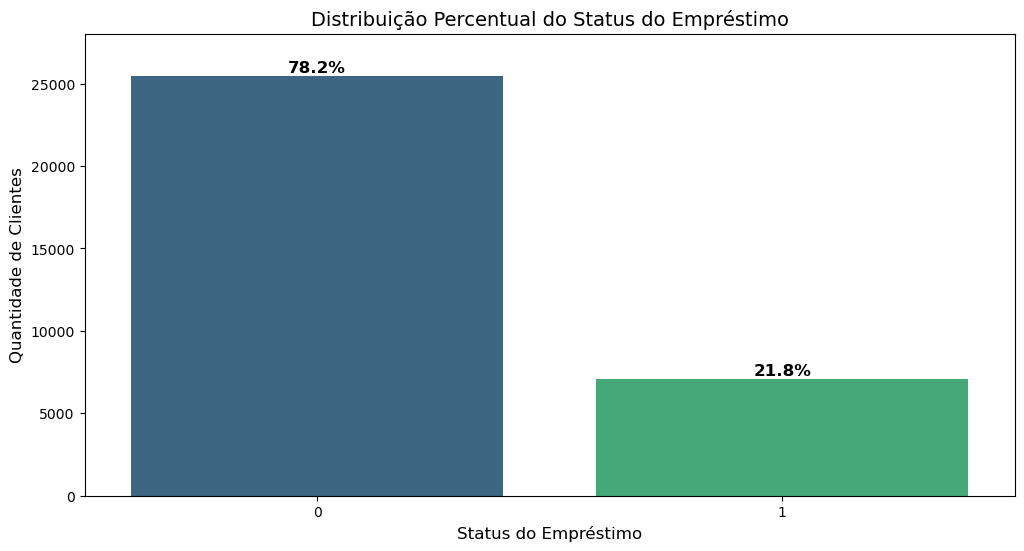

In [13]:
plt.figure(figsize=(12, 6))

# Criando o gráfico de contagem
ax = sns.countplot(x='loan_status', data=df_credit, palette='viridis', hue='loan_status', legend=False)

# Adicionando as porcentagens no topo de cada barra
for p in ax.patches:
    # Calcula a porcentagem em relação ao total de linhas do dataset
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_credit))
    
    # Coordenada x: centro da barra
    x = p.get_x() + p.get_width() / 2
    # Coordenada y: topo da barra
    y = p.get_height()
    
    # Adiciona o texto no gráfico
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Distribuição Percentual do Status do Empréstimo', fontsize=14)
plt.xlabel('Status do Empréstimo', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)

# Ajuste para o texto não encostar no topo do gráfico
plt.ylim(0, df_credit['loan_status'].value_counts().max() * 1.1)

plt.show()

In [14]:
df_credit['loan_status'].value_counts(normalize=True)

loan_status
0   0.78
1   0.22
Name: proportion, dtype: float64

### Análise de Dados Faltantes

A análise de valores ausentes indica que o dataset apresenta baixo nível de dados faltantes. Apenas duas variáveis possuem valores nulos:

- `loan_int_rate`: aproximadamente **10%** de valores ausentes  
- `person_emp_length`: aproximadamente **3%** de valores ausentes  

As demais variáveis não apresentam valores faltantes.

O baixo percentual de ausência sugere boa qualidade do dataset. As variáveis com valores ausentes serão analisadas individualmente na etapa de pré-processamento para definição da melhor estratégia de tratamento (imputação ou exclusão).

In [15]:
df_credit.isnull().mean().sort_values(ascending=False)

loan_int_rate                0.10
person_emp_length            0.03
person_age                   0.00
person_income                0.00
person_home_ownership        0.00
loan_intent                  0.00
loan_grade                   0.00
loan_amnt                    0.00
loan_status                  0.00
loan_percent_income          0.00
cb_person_default_on_file    0.00
cb_person_cred_hist_length   0.00
dtype: float64

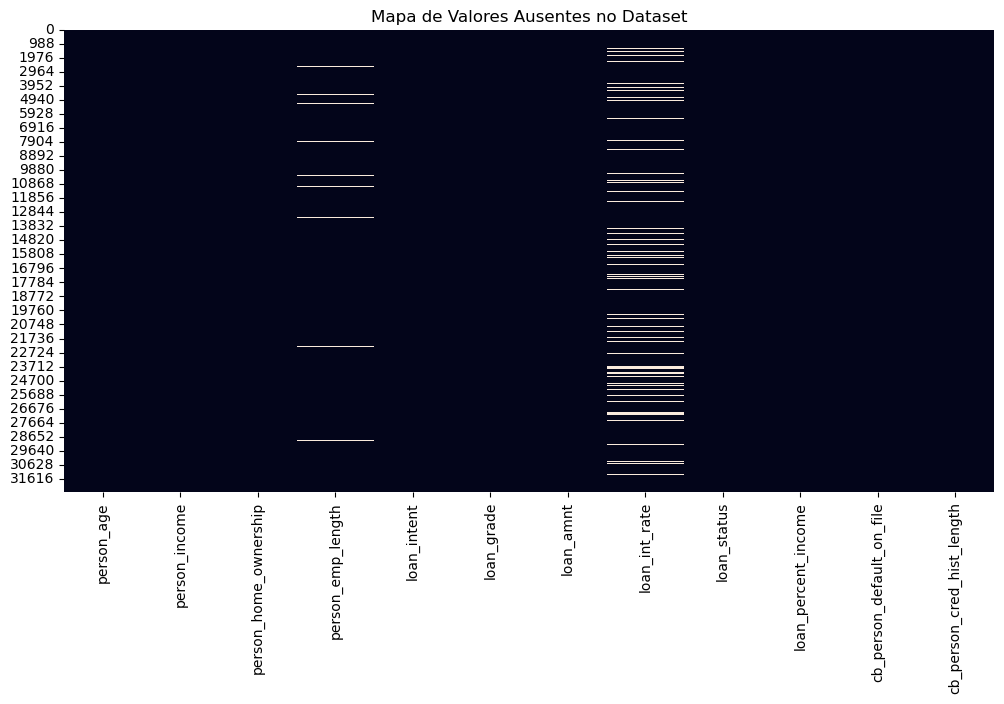

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_credit.isnull(), cbar=False)
plt.title("Mapa de Valores Ausentes no Dataset")
plt.show()

### Interpretação dos Dados Faltantes e Decisões de Tratamento

A análise de valores ausentes foi complementada com uma avaliação sob a perspectiva de negócio, considerando o impacto potencial de cada variável no risco de crédito.

#### `loan_int_rate`
Esta variável apresenta aproximadamente **10% de valores ausentes**.

**Interpretação de Negócio:**  
A ausência da taxa de juros pode estar relacionada a empréstimos ainda não totalmente precificados no momento do registro ou a inconsistências operacionais no processo de concessão. Do ponto de vista de negócio, a taxa de juros é fortemente associada ao risco do cliente, sendo um indicador relevante para a modelagem.

**Decisão:**  
- A variável **não será removida**, devido à sua alta relevância preditiva.  
- Os valores ausentes serão **imputados na etapa de pré-processamento**, utilizando estratégia a ser definida (ex.: media da taxa de juros `loan_int_rate` por grupo de risco `loan_grade`).  
- A criação de uma *flag* de ausência poderá ser avaliada, caso a ausência demonstre impacto significativo no `loan_status`. A criação de uma variável indicadora (*flag*) de ausência permite que o modelo capture 
possíveis padrões associados à falta de informação, preservando o sinal informacional 
contido nos valores ausentes.

---

#### `person_emp_length`
Esta variável apresenta aproximadamente **3% de valores ausentes**.

**Interpretação de Negócio:**  
A ausência de tempo de emprego pode estar associada a clientes desempregados, autônomos ou com vínculos informais. Portanto, o valor ausente pode carregar informação relevante sobre a estabilidade profissional do cliente.

**Decisão:**  
- A variável **não será removida**, pois representa um fator importante de estabilidade financeira.  
- Os valores ausentes poderão ser **imputados com valor zero ou mediana**, dependendo da estratégia adotada.  
- Será avaliada a criação de uma **flag indicando ausência**, permitindo que o modelo capture possíveis padrões associados à informalidade ou desemprego.

---

#### Demais Variáveis
As demais variáveis do dataset não apresentam valores ausentes, não demandando ações específicas nesta etapa.

---

Concluindo, dado o baixo percentual de valores ausentes e a ausência de padrões sistemáticos, não há necessidade de exclusão de registros nesta fase. As estratégias de imputação e engenharia de atributos serão aplicadas posteriormente, visando preservar a informação relevante para a modelagem preditiva.

## 4. **Estatísticas Descritivas — Variáveis Numéricas**

A tabela de estatísticas descritivas fornece uma visão geral da distribuição, dispersão e possíveis inconsistências das variáveis numéricas do dataset.

---

#### `person_age` — Idade
- **Média:** 27,7 anos  
- **Mediana:** 26 anos  
- **Mínimo:** 20 anos  
- **Máximo:** 144 anos **

**Interpretação:**  
A maior parte dos clientes concentra-se em faixas etárias jovens-adultas, o que é coerente com o perfil típico de solicitantes de crédito. No entanto, o valor máximo de **144 anos** é irreal do ponto de vista de negócio, indicando erro de cadastro ou inconsistência nos dados.

**Decisão:**  
Valores irreais de idade serão tratados na etapa de pré-processamento, por meio de remoção ou limitação (*capping*).

---

#### `person_income` — Renda Anual
- **Média:** 66.074  
- **Mediana:** 55.000  
- **Desvio padrão:** elevado (61.983)  
- **Máximo:** 6.000.000  

**Interpretação:**  
A média significativamente maior que a mediana indica **forte assimetria à direita**, confirmada pelo valor máximo extremamente elevado. Esse comportamento caracteriza uma **cauda longa**, comum em variáveis financeiras.

**Decisão:**  
Será avaliada a aplicação de **transformação logarítmica** ou a **discretização da variável em faixas de renda anual**, considerando o impacto de valores extremos e o comportamento dos diferentes algoritmos de *Machine Learning* na estabilidade e capacidade preditiva do modelo.

---

#### `person_emp_length` — Tempo de Emprego
- **Média:** 4,8 anos  
- **Mediana:** 4 anos  
- **Máximo:** 123 anos  

**Interpretação:**  
Embora a maioria dos valores esteja em faixas plausíveis, o valor máximo de **123 anos** é inconsistente com a realidade, indicando erro de preenchimento.

**Decisão:**  
Valores irreais serão tratados no pré-processamento. A ausência de dados poderá ser utilizada como sinal informacional por meio da criação de uma *flag* ou será atribuído o valor 0 (zero).

---

#### `loan_amnt` — Valor do Empréstimo
- **Média:** 9.589  
- **Mediana:** 8.000  
- **Máximo:** 35.000  

**Interpretação:**  
A distribuição apresenta leve assimetria à direita, com valores máximos elevados, porém plausíveis no contexto de crédito. O valor do empréstimo deve ser analisado em conjunto com a renda do cliente.

**Decisão:**  
A variável será mantida sem transformação inicial, com possível tratamento de outliers caso necessário.

---

#### `loan_int_rate` — Taxa de Juros
- **Média:** 11,0%  
- **Mediana:** 11,0%  
- **Intervalo:** 5,42% a 23,22%  

**Interpretação:**  
A taxa de juros apresenta distribuição concentrada em torno da média, com valores mínimos e máximos coerentes com práticas de mercado. As ausências identificadas anteriormente serão tratadas separadamente.

**Decisão:**  
A variável será mantida, com tratamento de valores ausentes no pré-processamento.

---

#### `loan_percent_income` — Percentual da Renda Comprometida
- **Média:** 0,17  
- **Mediana:** 0,15  
- **Máximo:** 0,83  

**Interpretação:**  
A maior parte dos clientes compromete uma fração moderada da renda com o empréstimo. Valores próximos a 1 indicam comprometimento elevado, caracterizando perfis de maior risco, porém ainda plausíveis.

**Decisão:**  
A variável será mantida, com monitoramento de valores extremos.

---

#### `cb_person_cred_hist_length` — Tempo de Histórico de Crédito
- **Média:** 5,8 anos  
- **Mediana:** 4 anos  
- **Máximo:** 30 anos  

A maioria dos clientes possui histórico de crédito relativamente curto, o que é comum em bases de crédito. Valores máximos observados são plausíveis.

---

A análise estatística confirma a presença de assimetria e outliers em variáveis financeiras, além de inconsistências pontuais em variáveis de idade e tempo de emprego. As decisões de tratamento serão aplicadas na etapa de pré-processamento, preservando o sinal informacional relevante para a modelagem.


In [17]:
df_credit.describe()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
count    32581.00       32581.00           31686.00   32581.00       29465.00   
mean        27.73       66074.85               4.79    9589.37          11.01   
std          6.35       61983.12               4.14    6322.09           3.24   
min         20.00        4000.00               0.00     500.00           5.42   
25%         23.00       38500.00               2.00    5000.00           7.90   
50%         26.00       55000.00               4.00    8000.00          10.99   
75%         30.00       79200.00               7.00   12200.00          13.47   
max        144.00     6000000.00             123.00   35000.00          23.22   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
count     32581.00             32581.00                    32581.00  
mean          0.22                 0.17                        5.80  
std           0.41                 0.11                        4.06  
min           0.00                 0.00                        2.00  
25%           0.00                 0.09                        3.00  
50%           0.00                 0.15                        4.00  
75%           0.00                 0.23                        8.00  
max           1.00                 0.83                       30.00

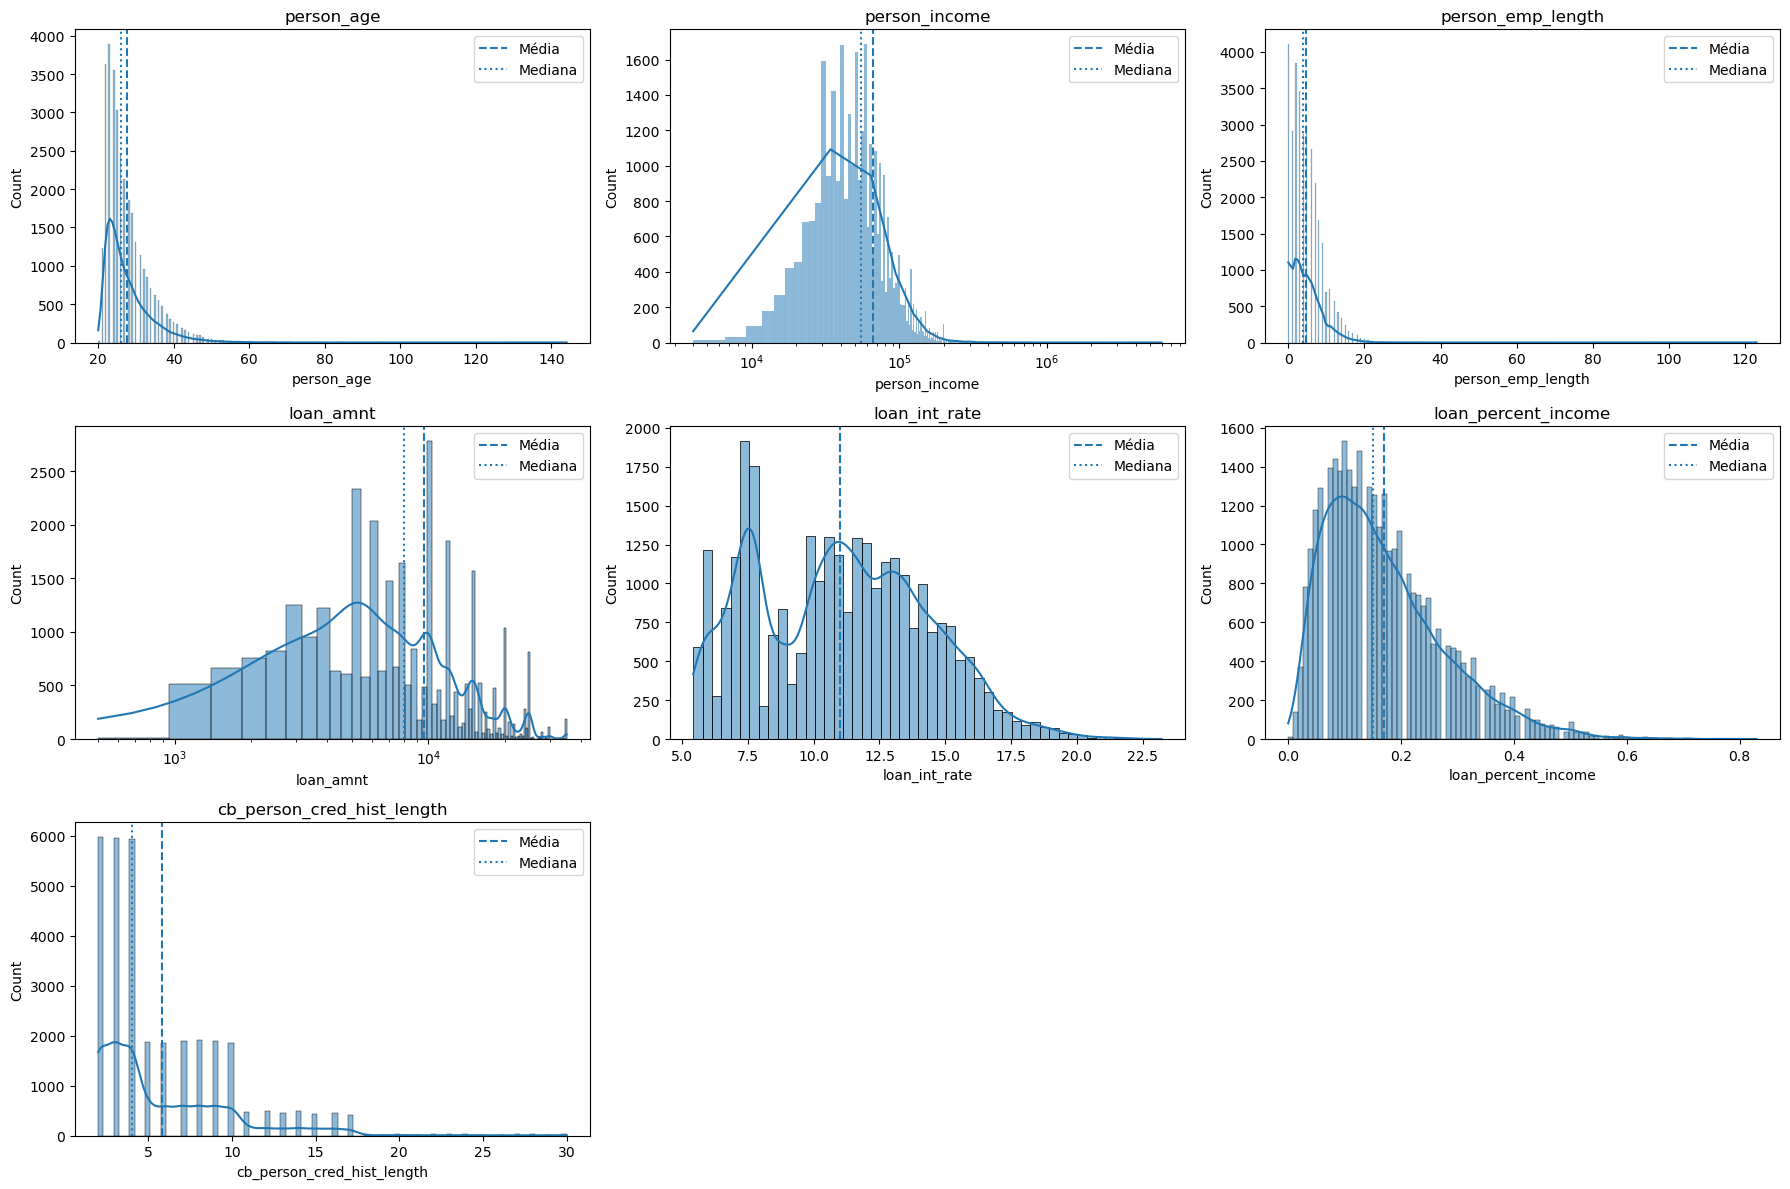

In [18]:
# Nome das Colunas Quantitativas
numeric_cols = df_credit.select_dtypes(include=['int64', 'float64']).columns

# Removendo a coluna Target
numeric_cols = numeric_cols.drop('loan_status')

# Definindo o numero de colunas
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    data = df_credit[col].dropna()

    sns.histplot(data, bins='fd', kde=True, ax=axes[idx])

    mean = data.mean()
    median = data.median()

    axes[idx].axvline(mean, linestyle='--', label='Média')
    axes[idx].axvline(median, linestyle=':', label='Mediana')

    axes[idx].set_title(col)
    axes[idx].legend()

    if col in ['person_income', 'loan_amnt']:
        axes[idx].set_xscale('log')

for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## 5. **Estatísticas Descritivas — Variáveis Categóricas**

Nesta etapa, foi realizada a análise individual das variáveis categóricas do dataset, com o objetivo de compreender a distribuição das categorias, identificar classes dominantes ou raras e antecipar decisões de pré-processamento para a modelagem.

---

### `person_home_ownership` — Situação de Moradia

**Descrição:**  
Representa a condição de moradia do cliente (`RENT`, `MORTGAGE`, `OWN`, `OTHER`).

**Análise:**  
Observa-se maior concentração nas categorias `RENT` e `MORTGAGE`, indicando que a maioria dos clientes não possui imóvel próprio. Categorias menos frequentes, como `OTHER`, apresentam baixa representatividade.

**Implicações para o Pré-processamento:**  
- Variável será codificada utilizando **One-Hot Encoding (dummies)**.
- Categorias com baixa frequência poderão ser agrupadas para reduzir a dimensionalidade.

---

### `loan_intent` — Intenção do Empréstimo

**Descrição:**  
Indica o motivo da solicitação do empréstimo (ex.: educacional, médico, pessoal, etc.).

**Análise:**  
A variável apresenta múltiplas categorias relativamente bem distribuídas. Algumas intenções podem estar associadas a maior risco financeiro, hipótese que será explorada em análises bivariadas com a variável alvo.

**Implicações para o Pré-processamento:**  
- Codificação por **One-Hot Encoding (dummies)**.
- Avaliação de agrupamento de categorias raras, se necessário.

---

### `loan_grade` — Classificação de Risco do Empréstimo

**Descrição:**  
Classificação atribuída ao empréstimo, variando de `A` (menor risco) a `G` (maior risco).

**Análise:**  
Embora apresente uma ordenação natural, a distância real entre as categorias não é conhecida. A distribuição mostra maior concentração nas categorias de menor risco.

**Implicações para o Pré-processamento:**  
- A variável será tratada como categórica nominal.
- Codificação utilizando **One-Hot Encoding (dummies)** para evitar suposições artificiais de distância entre as classes.

---

### `cb_person_default_on_file` — Histórico de Inadimplência

**Descrição:**  
Indica se o cliente já apresentou inadimplência anteriormente (`Y` / `N`).

**Análise:**  
Variável binária com alto potencial informativo, pois histórico de inadimplência é um forte indicativo de risco futuro.

**Implicações para o Pré-processamento:**  
- Codificação via **One-Hot Encoding (dummies)**.
- Pode ser utilizada diretamente nos modelos após a transformação.


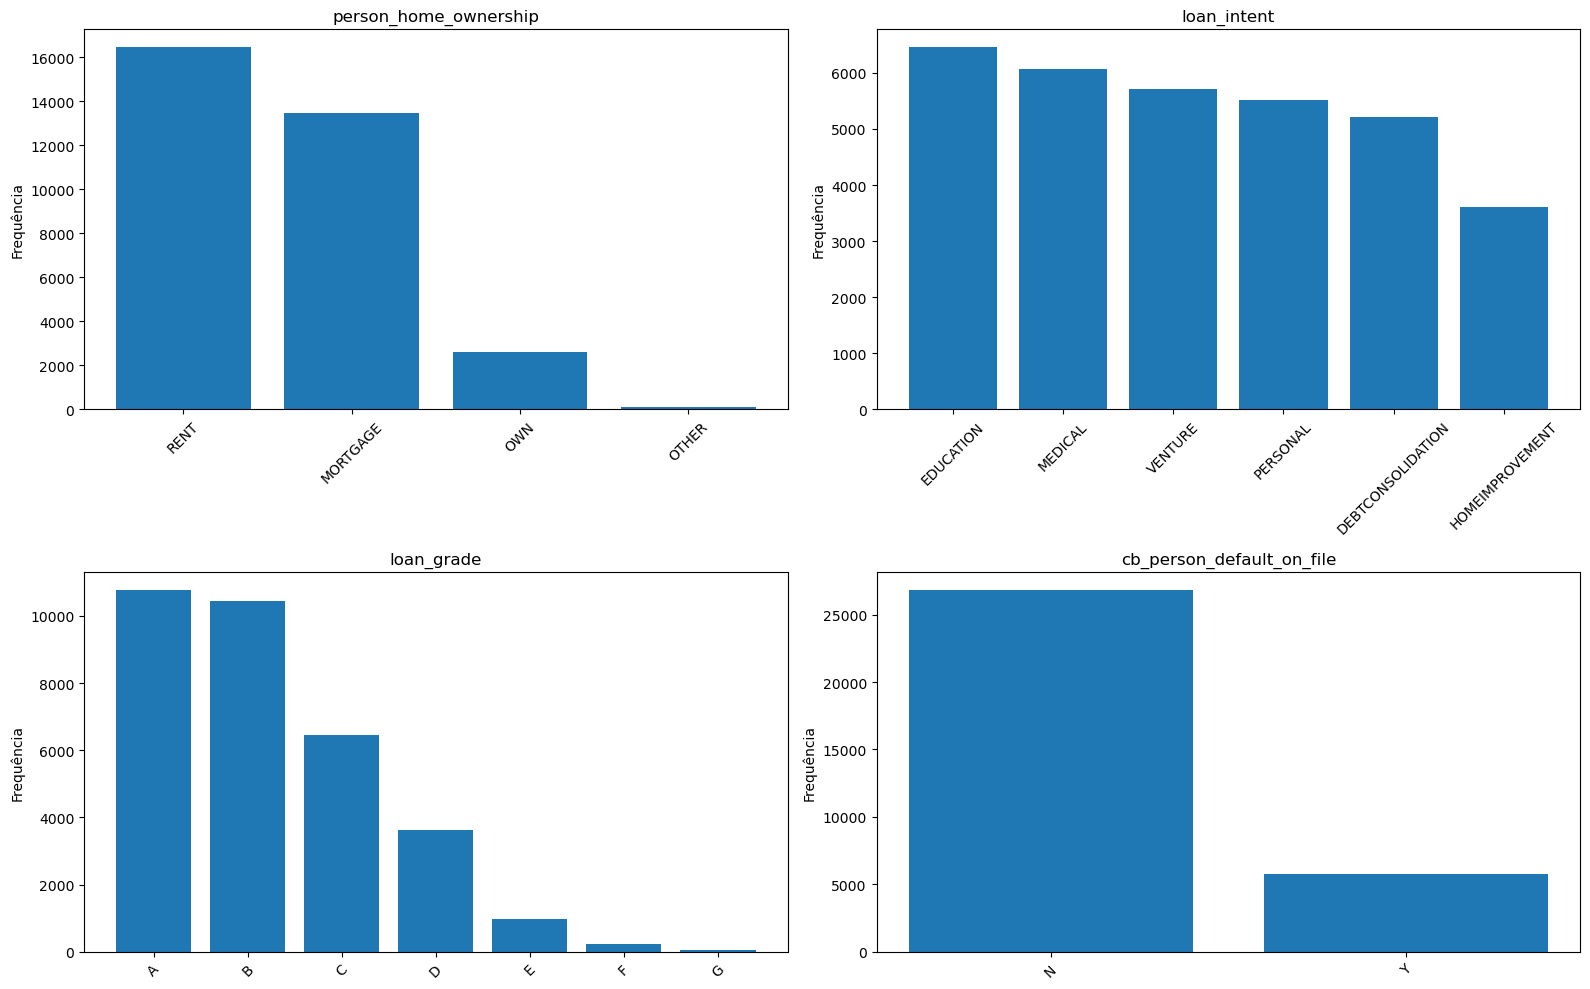

In [19]:
cat_cols = df_credit.select_dtypes(include=['object']).columns

n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
axes = axes.ravel()

for idx, col in enumerate(cat_cols):
    value_counts = df_credit[col].value_counts()

    axes[idx].bar(value_counts.index.astype(str), value_counts.values)
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Frequência')
    axes[idx].tick_params(axis='x', rotation=45)

# Remove gráficos vazios
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Análise Bivariada — `loan_grade` × `loan_status`

O gráfico apresenta a distribuição percentual dos clientes por grau de empréstimo (`loan_grade`), segmentada pelo status do empréstimo (`loan_status`).

Observa-se um padrão consistente de aumento da inadimplência conforme o grau de risco do empréstimo se eleva. Categorias de menor risco (`A` e `B`) concentram a maior parte dos empréstimos adimplentes, enquanto categorias de maior risco (`D`, `E`, `F` e `G`) apresentam proporção significativamente maior de inadimplência.

Destaca-se que a maior taxa relativa de inadimplência ocorre no grupo `D`, uma classe de risco intermediário. Esse comportamento sugere que a classificação atual pode apresentar limitações na separação entre clientes adimplentes e inadimplentes nessa faixa intermediária de risco, o que merece atenção em etapas posteriores de modelagem.

Esse padrão reforça a forte relação entre a classificação de risco atribuída ao empréstimo e o desfecho observado, validando a relevância da variável `loan_grade` como um importante preditor do `loan_status`.

A análise bivariada a seguir aprofunda essa relação, explorando quantitativamente as taxas de inadimplência por categoria.

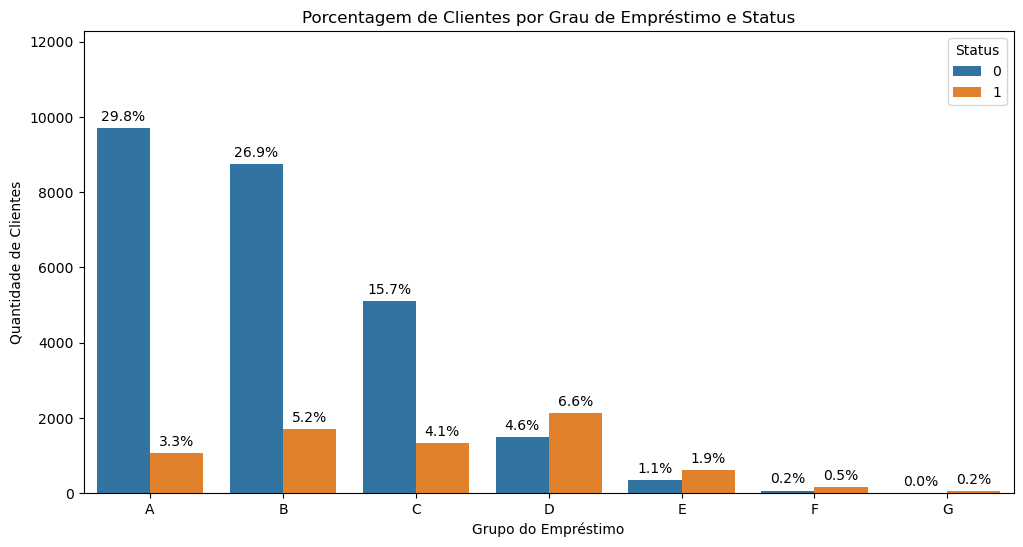

In [20]:
plt.figure(figsize=(12, 6))

# Criando o countplot com dodge=True para separar as colunas
ax = sns.countplot(data=df_credit, x='loan_grade', hue='loan_status', 
                   order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# Adicionando os rótulos de porcentagem
for container in ax.containers:
    # Calcula a porcentagem sobre o total do dataset (len(df_credit))
    # Se preferir a porcentagem sobre o total da barra, pode ajustar o cálculo
    labels = [f'{(v.get_height() / len(df_credit) * 100):.1f}%' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=3)

plt.title('Porcentagem de Clientes por Grau de Empréstimo e Status')
plt.xlabel('Grupo do Empréstimo')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Status', loc='upper right')
plt.ylim(0, df_credit['loan_grade'].value_counts().max() + 1500) # Espaço extra para o texto não cortar
plt.show()

### Análise Bivariada — `loan_grade` × `loan_status`

Ao analisar a taxa de inadimplência por grau de empréstimo, observa-se um aumento consistente do risco conforme a classificação do empréstimo se deteriora.

Categorias de menor risco (`A` e `B`) apresentam as menores taxas de inadimplência, enquanto categorias de maior risco (`E`, `F` e `G`) concentram as maiores proporções de default.

Destaca-se novamente o grupo `D`, que apresenta uma taxa de inadimplência elevada em relação às classes imediatamente anteriores, reforçando que a separação entre bons e maus pagadores nessa faixa intermediária pode ser mais desafiadora.

Esse resultado confirma a forte relação entre `loan_grade` e `loan_status`, validando a variável como um importante preditor para os modelos de Machine Learning.


In [21]:
# Função genérica para as categorias
def default_rate_by_category(df, col, target='loan_status'):
    rate = df.groupby(col)[target].mean().sort_values()
    
    rate.plot(kind='bar', figsize=(12,6))
    plt.ylabel('Taxa de Inadimplência')
    plt.title(f'Taxa de Default por {col}')
    plt.show()
    
    return rate

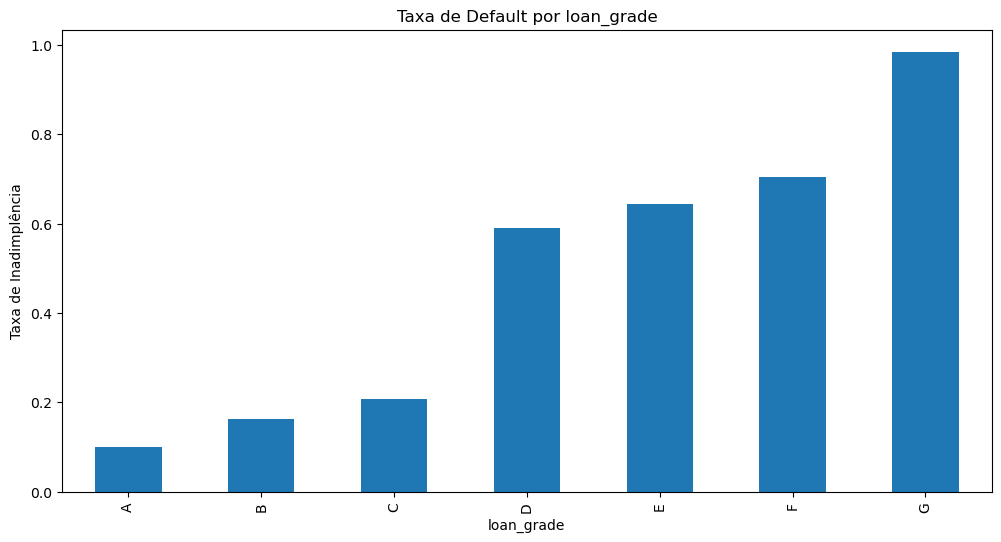

loan_grade
A   0.10
B   0.16
C   0.21
D   0.59
E   0.64
F   0.71
G   0.98
Name: loan_status, dtype: float64

In [22]:
default_rate_by_category(df_credit, 'loan_grade')

### Análise Bivariada — `loan_intent` × `loan_status`

Empréstimos destinados a **despesas médicas**, **consolidação de dívidas** e **reparos residenciais** apresentam as maiores taxas de inadimplência.

Essas categorias estão associadas a gastos que não geram retorno financeiro direto, caracterizando consumo ou situações emergenciais, o que pode comprometer a capacidade futura de pagamento do cliente. Em contraste, intenções como educação ou outros usos mais estruturados tendem a apresentar menores taxas de default, sendo mais próximas de um investimento de longo prazo.

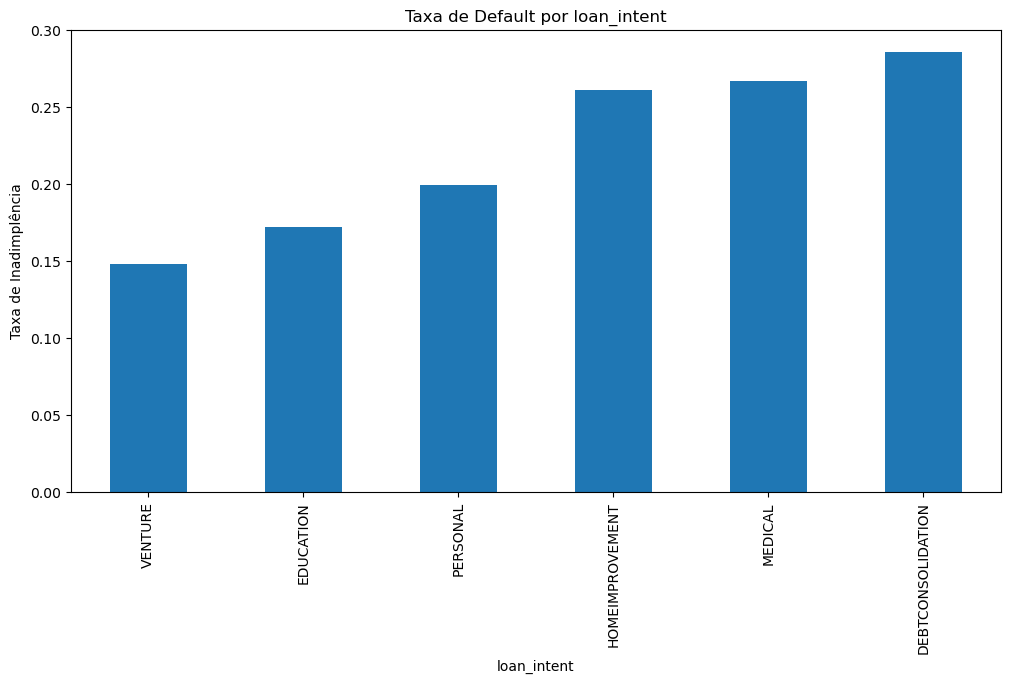

loan_intent
VENTURE             0.15
EDUCATION           0.17
PERSONAL            0.20
HOMEIMPROVEMENT     0.26
MEDICAL             0.27
DEBTCONSOLIDATION   0.29
Name: loan_status, dtype: float64

In [23]:
default_rate_by_category(df_credit, 'loan_intent')


### Análise Bivariada — `person_home_ownership` × `loan_status`

A análise indica que clientes que possuem imóvel próprio ou financiado (`OWN` e `MORTGAGE`) apresentam menores taxas de inadimplência quando comparados àqueles que vivem de aluguel (`RENT`).

Esse comportamento sugere maior estabilidade financeira e patrimonial. Além disso, a posse de um imóvel pode atuar como um fator disciplinador, uma vez que, em determinados contextos contratuais, o bem pode ser utilizado como garantia, reduzindo o risco percebido de inadimplência.

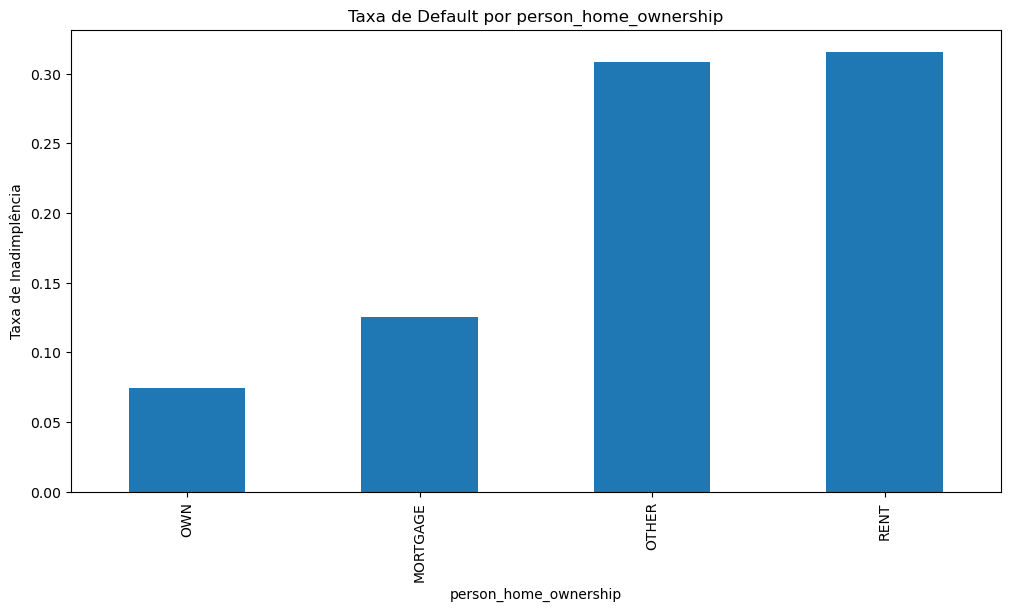

person_home_ownership
OWN        0.07
MORTGAGE   0.13
OTHER      0.31
RENT       0.32
Name: loan_status, dtype: float64

In [24]:
default_rate_by_category(df_credit, 'person_home_ownership')

### Análise Bivariada — `cb_person_default_on_file` × `loan_status`

Clientes com histórico prévio de inadimplência (`Y`) apresentam uma taxa de default significativamente maior em comparação aos clientes sem histórico (`N`), evidenciando um forte padrão de reincidência.

Esse resultado reforça o caráter preditivo da variável, indicando que comportamentos financeiros passados são relevantes para estimar o risco futuro de inadimplência.

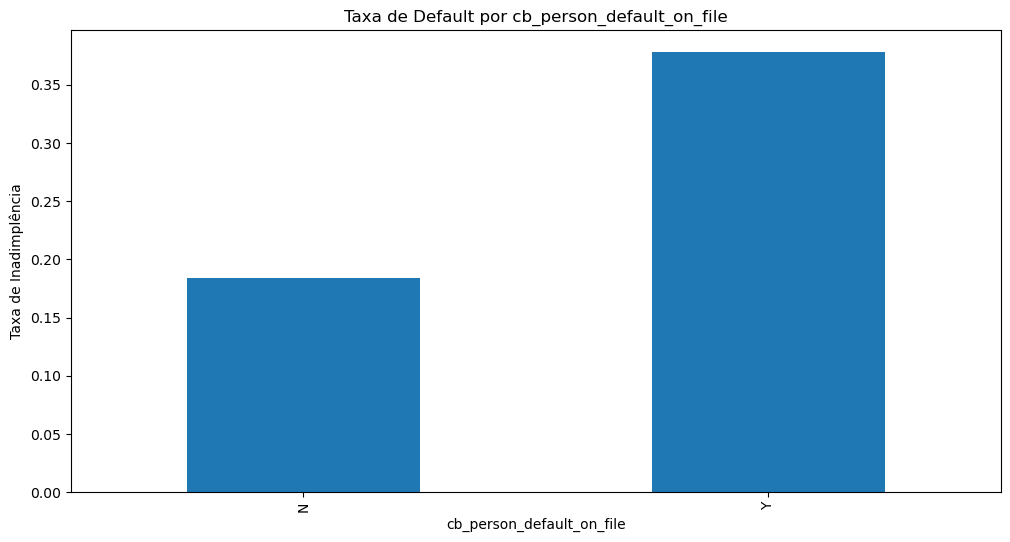

cb_person_default_on_file
N   0.18
Y   0.38
Name: loan_status, dtype: float64

In [25]:
default_rate_by_category(df_credit, 'cb_person_default_on_file')

## 5. **Estatísticas Descritivas — Variáveis Numéricas**

Nesta etapa, analisou-se a relação entre as variáveis numéricas e o status do empréstimo (`loan_status`), com o objetivo de identificar diferenças de comportamento entre clientes adimplentes e inadimplentes, bem como avaliar o poder discriminativo dessas variáveis.

Foram utilizados boxplots para comparar a distribuição, mediana e dispersão das variáveis entre as duas classes.

---

### Considerações sobre Outliers

Durante a análise, observou-se a presença de outliers em algumas variáveis numéricas, os quais impactam diretamente a escala dos gráficos, reduzindo a visibilidade do comportamento da maioria dos dados.

Esses valores foram **mantidos nesta etapa de EDA**, uma vez que o objetivo é diagnóstico e exploratório. A remoção ou transformação dos outliers será avaliada posteriormente, na etapa de pré-processamento, com base em critérios de negócio e impacto no desempenho dos modelos.

---

### Principais Insights por Variável

- **Renda Anual (`person_income`)**  
  Clientes inadimplentes apresentam, em média, renda inferior à dos clientes adimplentes. A distribuição apresenta cauda longa, sugerindo a aplicação de transformação logarítmica no pré-processamento.

- **Percentual da Renda Comprometida (`loan_percent_income`)**  
  Observa-se que clientes inadimplentes comprometem uma parcela significativamente maior da renda com o empréstimo, indicando forte relação com o risco de inadimplência.

- **Valor do Empréstimo (`loan_amnt`)**  
  A diferença no valor médio do empréstimo entre os grupos é menos expressiva, sugerindo que o valor absoluto, isoladamente, não é um forte discriminador de risco.

- **Tempo de Emprego (`person_emp_length`)**  
  Clientes adimplentes tendem a apresentar maior tempo médio de emprego, refletindo maior estabilidade profissional, apesar da presença de outliers.

- **Idade (`person_age`)**  
  A distribuição etária entre os grupos é relativamente semelhante, com leve concentração de inadimplência em faixas mais jovens. Valores extremos indicam a necessidade de tratamento de idades irreais.

- **Taxa de Juros (`loan_int_rate`)**  
  Clientes inadimplentes apresentam, em média, taxas de juros mais elevadas, refletindo a precificação de risco aplicada pela instituição financeira.

- **Tempo de Histórico de Crédito (`cb_person_cred_hist_length`)**  
  Históricos de crédito mais curtos estão associados a maiores taxas de inadimplência, indicando menor previsibilidade de comportamento financeiro.

In [26]:
num_cols = df_credit.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('loan_status')
num_cols

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

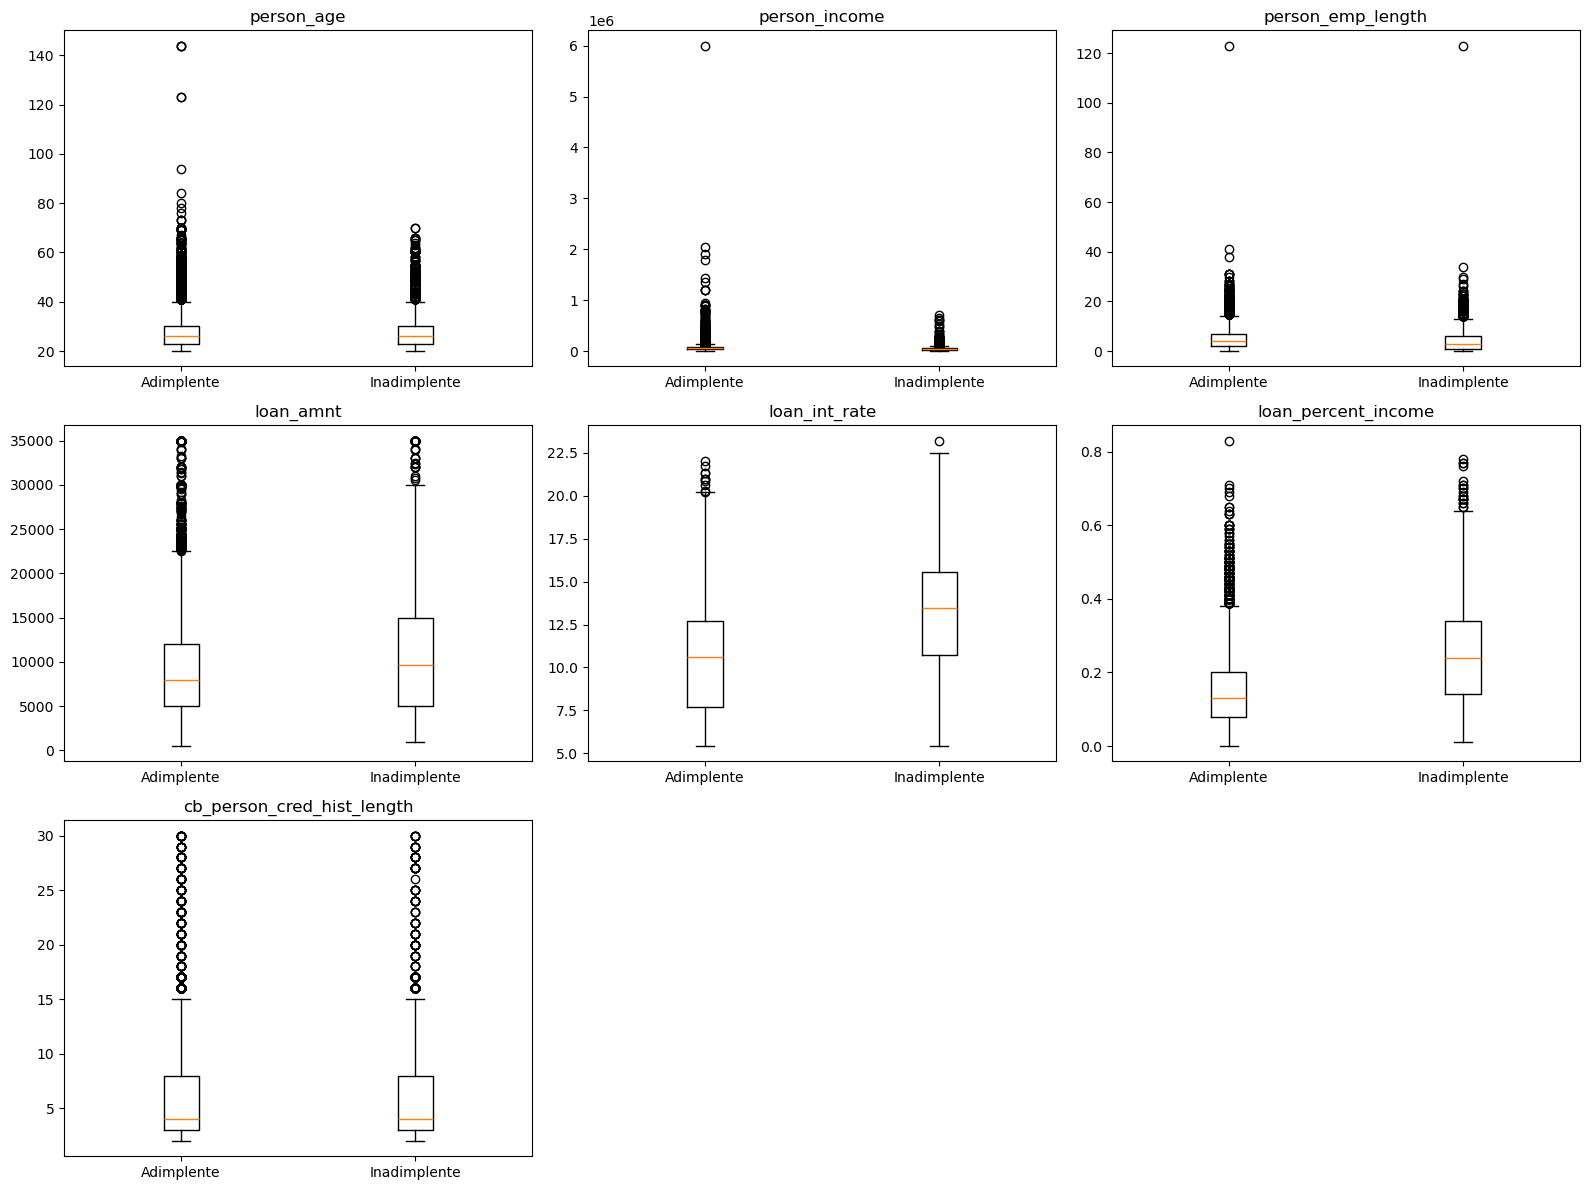

In [27]:
# Gerando os BoxPlot para cada variável quantitativa.

n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    axes[idx].boxplot(
        [df_credit[df_credit['loan_status'] == 0][col].dropna(),
         df_credit[df_credit['loan_status'] == 1][col].dropna()],
        labels=['Adimplente', 'Inadimplente']
    )
    axes[idx].set_title(col)

# Remove eixos vazios
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Além dos gráficos estáticos, foram utilizados boxplots interativos (Plotly) durante a exploração dos dados para facilitar a análise de outliers e a inspeção detalhada das distribuições.

**OBS:** No momento está oculto

In [31]:
import plotly.express as px

for col in num_cols:
    fig = px.box(
        df_credit,
        x='loan_status',
        y=col,
        color='loan_status',
        title=f'{col} × loan_status'
    )
    fig.show()

In [29]:
(
    df_credit
    .groupby('loan_status')[num_cols]
    .mean()
    .T
    .rename(columns={0: 'Adimplente', 1: 'Inadimplente'})
)


loan_status                 Adimplente  Inadimplente
person_age                       27.81         27.47
person_income                 70804.36      49125.65
person_emp_length                 4.97          4.14
loan_amnt                      9237.46      10850.50
loan_int_rate                    10.44         13.06
loan_percent_income               0.15          0.25
cb_person_cred_hist_length        5.84          5.69

### Mapa de Calor — Correlação entre Variáveis Numéricas

O mapa de calor apresenta a correlação linear entre as variáveis numéricas do dataset. De modo geral, observa-se ausência de correlações extremamente elevadas, indicando baixo risco de multicolinearidade severa.

Destaca-se a correlação negativa entre `loan_percent_income` e `person_income`, o que é esperado, uma vez que o comprometimento da renda tende a diminuir conforme a renda aumenta. Também observa-se correlação positiva moderada entre `loan_amnt` e `person_income`, sugerindo que clientes com maior renda tendem a solicitar empréstimos de maior valor.

Outra correlação relevante observada ocorre entre `person_age` e `cb_person_cred_hist_length`. Essa relação é esperada do ponto de vista lógico e de negócio, uma vez que indivíduos mais velhos tendem a possuir maior tempo de exposição ao mercado de crédito.

Apesar de intuitiva, essa correlação reforça a coerência dos dados e indica que o histórico de crédito está alinhado com a trajetória etária dos clientes. Ainda assim, não se trata de uma correlação perfeita, o que sugere variações no momento de entrada no sistema financeiro e no comportamento individual de uso de crédito.

Essa relação será considerada na etapa de modelagem, especialmente no que diz respeito à possível redundância parcial de informação entre as variáveis, sem implicar necessariamente na exclusão de qualquer uma delas.

Esses resultados indicam que as variáveis numéricas fornecem informações complementares e podem ser utilizadas conjuntamente na modelagem, com atenção posterior à padronização e possíveis transformações.


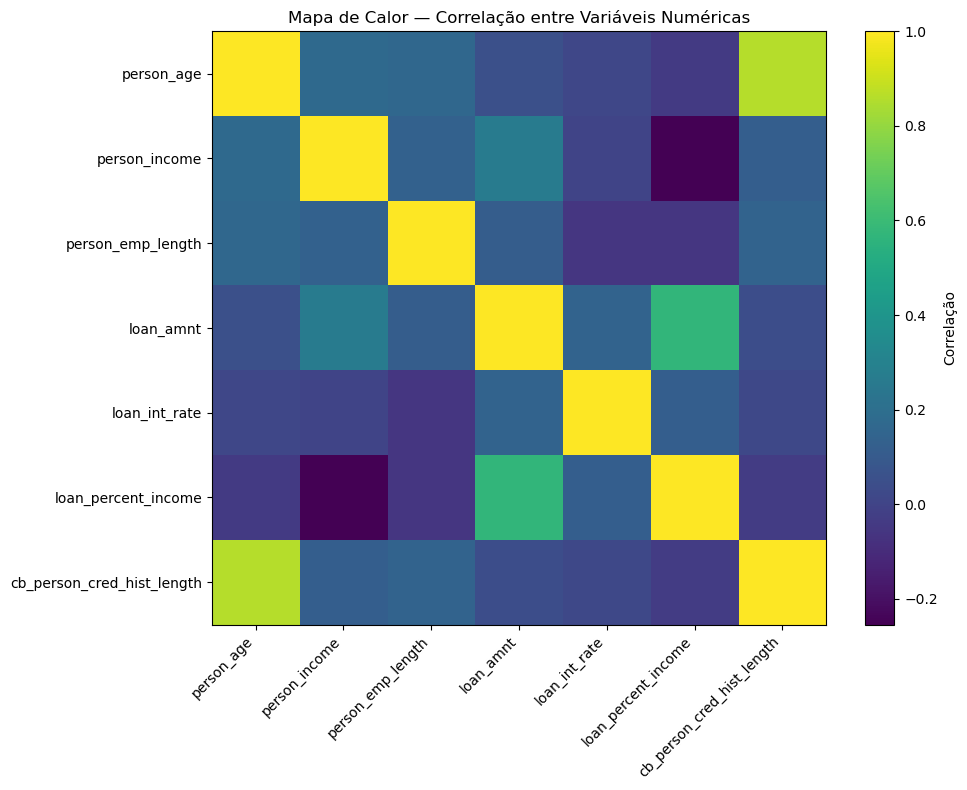

In [35]:
num_cols = df_credit.select_dtypes(include=['int64', 'float64'])
num_cols.head()

num_cols_corr = num_cols.drop(columns=['loan_status'])

corr_matrix = num_cols_corr.corr()
corr_matrix

fig, ax = plt.subplots(figsize=(10, 8))

im = ax.imshow(corr_matrix, aspect='auto')

# Eixos
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.columns)

# Barra de cor
cbar = plt.colorbar(im)
cbar.set_label('Correlação')

plt.title('Mapa de Calor — Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()


## Síntese da Análise

De modo geral, as variáveis numéricas analisadas apresentam comportamento consistente com a lógica de negócio. Variáveis relacionadas à capacidade de pagamento e estabilidade financeira demonstram maior poder discriminativo em relação ao risco de inadimplência, enquanto outras exercem influência mais indireta.

### Principais Insights da Análise Exploratória de Dados (EDA)

A análise exploratória permitiu compreender o comportamento das variáveis e sua relação com o risco de inadimplência, destacando padrões consistentes com a lógica de negócio e relevantes para a etapa de modelagem.

**Principais achados:**

- O dataset apresenta leve desbalanceamento da variável alvo, com aproximadamente 22% de inadimplentes, cenário comum em problemas de risco de crédito e adequado para modelagem preditiva.

- Variáveis relacionadas à **capacidade de pagamento** e **estabilidade financeira**, como `person_income`, `loan_percent_income` e `person_emp_length`, demonstram forte associação com o risco de inadimplência.

- A variável `loan_grade` apresenta elevada capacidade discriminativa, com aumento consistente da taxa de default conforme o grau de risco do empréstimo se deteriora, especialmente nas classes intermediárias.

- Clientes com **histórico prévio de inadimplência** (`cb_person_default_on_file`) apresentam taxa significativamente maior de reincidência, embora o comportamento não seja determinístico.

- Empréstimos destinados a **despesas não produtivas**, como gastos médicos, consolidação de dívidas e reparos residenciais, apresentam maiores taxas de inadimplência em comparação a intenções mais estruturadas.

- O mapa de correlação indica ausência de multicolinearidade severa entre as variáveis numéricas, com correlações coerentes do ponto de vista de negócio, como entre idade e histórico de crédito.

- A presença de outliers foi identificada em algumas variáveis numéricas. Esses valores foram mantidos durante o EDA para fins diagnósticos, com o tratamento adequado sendo avaliado na etapa de pré-processamento.

Com base nos padrões observados, a próxima etapa envolve tratamento de outliers, codificação de variáveis categóricas e padronização, preparando os dados para a modelagem preditiva.
